<a href="https://colab.research.google.com/github/swathie/Sentiment-Analysis/blob/main/Sentiment_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import PyDrive and associated libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1XlHeLAqTpkpuZWwtmJ1hoodqHGR112JB' 
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')

In [ ]:
pip install contractions


In [ ]:
pip install contractions

In [ ]:
pip install nltk

In [ ]:
pip install emoji --upgrade

In [ ]:
pip install transformers

#### imports


In [ ]:
import re
import emoji

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

import contractions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# read dataframe stored in Google Drive in csv format
df = pd.read_csv("tweet_data.csv")
df.head(10)

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative
5,1956969035,@charviray Charlene my love. I miss you,negative
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative
7,1956969531,Choked on her retainers,negative
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Text Processing


In [ ]:
#replace occurences of RT with a default value
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

# replace @user with a default user tag
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

# replace emojis with a meaningful text
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet


def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet


# handle capitalized words
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

# for example word loooooook becomes look
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

# replace punctuations with default value
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet


#  replaces contractions with their extended forms by using the contractions package
def fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet





In [ ]:
#custom tokenize function
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

#takes the list of tokens as input and returns a list of stemmed tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

In [ ]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)

# representing data frames in two lists: one for the tweet tokens (X) and one for the tweet sentiment (y)

X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bc, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[u, watch, hill, london, u, realis, tourtur, w...",0


#### lemmatization and stemming comparison

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tokens = ["international", "companies", "had", "interns"]

#stemming  
stemmer_snow = SnowballStemmer("english") # define stemmer

#lemmatization
word_pos = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [ ]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_pos, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


In [ ]:
print("Snowball stems: {}".format(stem_tokens(tokens, stemmer_snow)))

Snowball stems: ['intern', 'compani', 'had', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 2` Vectorization

#### Bag of words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#build the Bag-of-Words vectorizer with the corpus
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [ ]:
# example

corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "bag"],
          ["i", "am", "so", "sad"]]

cv_vect = fit_cv(corpus)

# get features
ft = cv_vect.get_feature_names()

#convert corpus to matrix 
cv_mtx = cv_vect.transform(corpus)



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cv_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['am',
 'computer',
 'happy',
 'hate',
 'i',
 'lost',
 'love',
 'miss',
 'my',
 'nlp',
 'sad',
 'so',
 'you']

In [ ]:
#transform new tweet using count vectorizer
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [ ]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

#### Postive/ Negative frequencies

In [ ]:
#  build a dictionnary with the word and sentiment as index and the count of occurence(freq) as value
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  #looping through each tweet and sentiment
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      # creating a tuple with word and sentiment
      pair = (word, sentiment)
      # check if the word already exists in the freqs, if it does increment by 1, else add it to the freqs
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs


# convert tweets to a 2-d array by using the frequency dictionnary
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    # check if the word is associated to +ve sentiment in the dictionary, get the freq and add it to the 1st dimension of the array  
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
   # if the word is associated to -ve sentiment, add the frequency to the 2nd dimension of our array 
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

In [ ]:
# example for pos/neg freqs
freqs_all = build_freqs(X_train, y_train)
print (tweet_to_freq(['I','love','nlp'], freqs_all))

[1111.   55.]


#### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#build the TF-IDF vectorizer with the corpus
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 3` Sentiment Model

In [ ]:
import seaborn as sn

# plot the confusion matrix for the different models 
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

#### Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
# split arrays of X and y into training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# fit a Logistic Regression model on X and y training data
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

#### Model fitting for BoW

In [ ]:
cv = fit_cv(X_train)

#converting the vectorizer cv to a matrix
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

# Fit the Logistic Regression model on training data by using the fit_lr function
model_lr_cv = fit_lr(X_train_cv, y_train)

#shape of the matrix is (#no. of tweets, #no of features in the tweet corpus)
X_train_cv.shape
#len(cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


array([0, 0, 0, ..., 0, 0, 0])

#### Model fitting for Pos/Neg frequencies


In [ ]:
#Use the build_freqs function on training data to create a frequency dictionnary
#Use the frequency dictionnary together with the tweet_to_freq function to convert X_train and X_test data to 2-d vectors

freqs = build_freqs(X_train, y_train)
print(freqs)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

# Fit the Logistic Regression model on training data by using the fit_lr function
model_lr_pn = fit_lr(X_train_pn, y_train)

{('vcenter', 0): 1, ('screw', 0): 16, ('today', 0): 306, ('specif', 0): 4, ('mssql', 0): 1, ('server', 0): 10, ('connect', 0): 8, ('realli', 1): 275, ('good', 1): 1017, ('mood', 1): 22, ('absolut', 1): 27, ('reason', 1): 17, ('tee', 1): 1, ('im', 0): 332, ('sadd', 0): 5, ('sancha', 0): 1, ('june', 0): 15, ('fail', 0): 93, ('go', 0): 789, ('chini', 0): 1, ('chillin', 1): 20, ('follow', 1): 168, ('cool', 1): 164, ('peopl', 1): 87, ('omg', 1): 45, ('beckki', 1): 1, ('love', 1): 1111, ('rootin', 1): 1, ('how', 1): 1, ('thing', 1): 137, ('go', 1): 598, ('saw', 1): 68, ('statthement', 1): 2, ('mayb', 1): 42, ('receiv', 1): 6, ('unholi', 1): 1, ('aiden', 1): 2, ('fan', 1): 58, ('packag', 1): 3, ('yaay', 1): 10, ('not', 0): 1850, ('eat', 0): 62, ('lunch', 0): 28, ('wife', 0): 9, ('like', 0): 448, ('want', 0): 377, ('appar', 0): 17, ('get', 0): 536, ('anymor', 0): 52, ('sad', 0): 402, ('look', 1): 267, ('cute', 1): 101, ('omg', 0): 80, ('u', 0): 202, ('nasti', 0): 8, ('school', 0): 100, ('guy',

#### Model fitting for TF-IDF

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

# Fit the Logistic Regression model on training data by using the fit_lr function
model_lr_tf = fit_lr(X_train_tf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 4` Performance Metrics


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Predict count vectorizer(BoW)

In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [ ]:
print("LR Model Accuracy count vectorizer: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))
accuracy_lr_cv = accuracy_score(y_test, y_pred_lr_cv)

LR Model Accuracy count vectorizer: 88.63%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

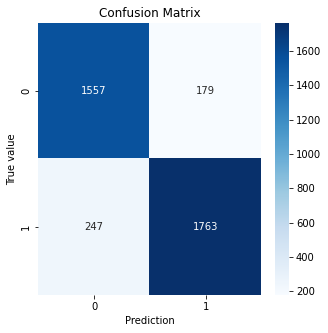

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

#### predict POS/Neg frequencies

In [ ]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

print("LR Model Accuracy Pos/Neg freq: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

LR Model Accuracy Pos/Neg freq: 78.32%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

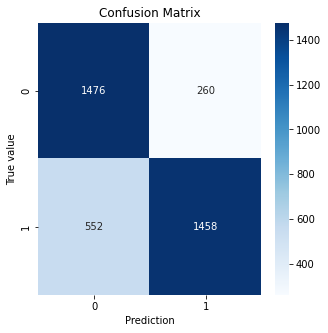

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

#### predict TF-IDF

In [ ]:
# Use the fitted model_lr_tf (TF-IDF) to predict X_test
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [ ]:
print("LR Model Accuracy TF-IDF: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))
accuracy_lr_tf = accuracy_score(y_test, y_pred_lr_tf)

LR Model Accuracy TF-IDF: 88.57%


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

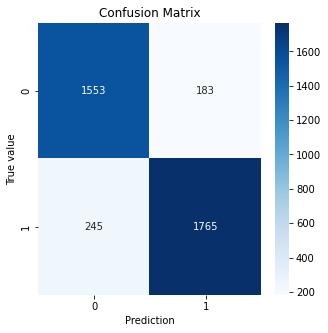

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## Pipeline

In [ ]:
my_tweet = "I feel great on a holiday"

In [ ]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [ ]:
predict_tweet(my_tweet)

'Prediction is positive sentiment'

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# Misc

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
def fit_nb(X_train, y_train):
  model = GaussianNB()
  model.fit(X_train, y_train)
  return model

Bag Of words - NB


In [ ]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

# Fit the Logistic Regression model on training data by using the fit_nb function
model_nb_cv = fit_nb(X_train_cv.toarray(), y_train)

X_train_cv

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


<14981x11823 sparse matrix of type '<class 'numpy.int64'>'
	with 104286 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred_nb_cv = model_nb_cv.predict(X_test_cv.toarray())

In [ ]:
print("NB Model Accuracy count vectorizer: {:.2%}".format(accuracy_score(y_test, y_pred_nb_cv)))
accuracy_nb_cv = accuracy_score(y_test, y_pred_nb_cv)

NB Model Accuracy count vectorizer: 58.60%


TF-IDF For Naive Bayes


In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

# Fit the Naive Bayes model on training data by using the fit_nb function
model_nb_tf = fit_nb(X_train_tf.toarray(), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
y_pred_nb_tf = model_nb_tf.predict(X_test_tf.toarray())

In [ ]:
print("NB Model Accuracy TF-IDF: {:.2%}".format(accuracy_score(y_test, y_pred_nb_tf)))
accuracy_nb_tf = accuracy_score(y_test, y_pred_nb_tf)

NB Model Accuracy TF-IDF: 60.97%


#### Decision Tree

In [ ]:
from sklearn import tree

def fit_dt(X_train, y_train):
  model = tree.DecisionTreeClassifier()
  model.fit(X_train, y_train)
  return model

BAg of words - dt

In [ ]:
# Fit the Decision Tree model on training data by using the fit_dt function
cv = fit_cv(X_train)
X_train_dt = cv.transform(X_train)
X_test_dt = cv.transform(X_test)

# Fit the Decsion Tree model on training data by using the fit_dt function
model_dt_cv = fit_dt(X_train_dt, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
y_pred_dt_cv = model_dt_cv.predict(X_test_cv.toarray())

In [ ]:
print("DT Model Accuracy count vectorizer: {:.2%}".format(accuracy_score(y_test, y_pred_dt_cv)))
accuracy_dt_cv = accuracy_score(y_test, y_pred_dt_cv)

DT Model Accuracy count vectorizer: 83.80%


TF IDF - DT

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

# Fit the decision Tree model on training data by using the fit_dt function
model_dt_tf = fit_dt(X_train_tf.toarray(), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
y_pred_dt_tf = model_dt_tf.predict(X_test_tf.toarray())

In [ ]:
print("DT Model Accuracy TF-IDF: {:.2%}".format(accuracy_score(y_test, y_pred_dt_tf)))
accuracy_dt_tf = accuracy_score(y_test, y_pred_dt_tf)

DT Model Accuracy TF-IDF: 83.16%


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def fit_rf(X_train, y_train):
  model = tree.DecisionTreeClassifier()
  model.fit(X_train, y_train)
  return model

Bag of words - RF

In [ ]:
# Fit the Random Forest model on training data by using the fit_dt function
cv = fit_cv(X_train)
X_train_dt = cv.transform(X_train)
X_test_dt = cv.transform(X_test)

# Fit the Random Forest model on training data by using the fit_dt function
model_rf_cv = fit_rf(X_train_dt, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
y_pred_rf_cv = model_rf_cv.predict(X_test_cv.toarray())

In [ ]:
print("RF Model Accuracy count vectorizer: {:.2%}".format(accuracy_score(y_test, y_pred_rf_cv)))
accuracy_rf_cv = accuracy_score(y_test, y_pred_rf_cv)

RF Model Accuracy count vectorizer: 83.77%


TF-IDF - RF


In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

# Fit the Logistic Regression model on training data by using the fit_nb function
model_rf_tf = fit_rf(X_train_tf.toarray(), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
y_pred_rf_tf = model_rf_tf.predict(X_test_tf.toarray())

In [ ]:
print("RF Model Accuracy TF-IDF: {:.2%}".format(accuracy_score(y_test, y_pred_rf_tf)))
accuracy_rf_tf = accuracy_score(y_test, y_pred_rf_tf)

RF Model Accuracy TF-IDF: 82.30%


Comparison of Tf-IDF of models

([<matplotlib.axis.XTick at 0x7f8871cf9790>,
 [Text(0, 0, 'Logistic Reg'),
  Text(0, 0, 'Naive Bayes'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')])

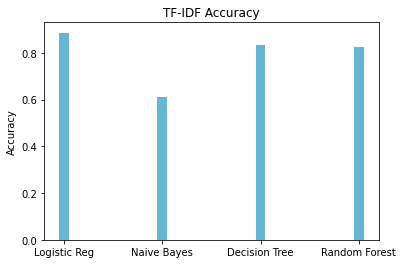

In [ ]:
ax = plt.subplot(111)
ax.set_title('TF-IDF Accuracy')
plt.ylabel('Accuracy')
models = ['Logistic Reg','Naive Bayes','Decision Tree','Random Forest']
values = [accuracy_lr_tf,accuracy_nb_tf,accuracy_dt_tf,accuracy_rf_tf]
model = np.arange(len(models))
plt.bar(model,values,align='center',width=0.10,alpha=0.7,color='#2596be')
plt.xticks (model,models)


Comparison of BOW

([<matplotlib.axis.XTick at 0x7f8870f7ca90>,
 [Text(0, 0, 'Logistic Reg'),
  Text(0, 0, 'Naive Bayes'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'Random Forest')])

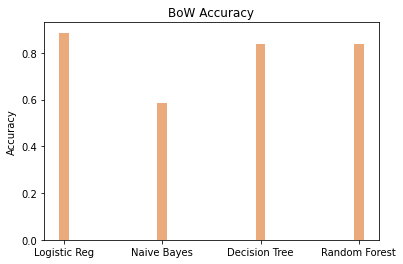

In [ ]:
ax = plt.subplot(111)
ax.set_title('BoW Accuracy')
models = ['Logistic Reg','Naive Bayes','Decision Tree','Random Forest']
values = [accuracy_lr_cv,accuracy_nb_cv,accuracy_dt_cv,accuracy_rf_cv]
plt.ylabel('Accuracy')
model = np.arange(len(models))
plt.bar(model,values,align='center',width=0.10,alpha=0.7,color='#e28743')
plt.xticks (model,models)